<a href="https://colab.research.google.com/github/moaadouhmad99-ops/DI_Bootcamp/blob/main/Week6/Day2/Ex_XP_Ninja_W6_D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercises XP Ninja**

In [ ]:
uploaded = files.upload()  # Choisis ton fichier

Saving bird_small.mat to bird_small.mat


In [ ]:
# Charger l'image MATLAB
data = loadmat('bird_small.mat')
A = data['A']  # A a la forme (height, width, 3)

# Normaliser les pixels (0 à 1)
A = A / 255.0

# Reshaper en 2D : chaque ligne = pixel, colonnes = R,G,B
X = A.reshape(-1, 3)
print("Shape of X:", X.shape)
A.shape

Shape of X: (16384, 3)


(128, 128, 3)

In [ ]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [ ]:
X

array([[0.85882353, 0.70588235, 0.40392157],
       [0.90196078, 0.7254902 , 0.45490196],
       [0.88627451, 0.72941176, 0.43137255],
       ...,
       [0.25490196, 0.16862745, 0.15294118],
       [0.22745098, 0.14509804, 0.14901961],
       [0.20392157, 0.15294118, 0.13333333]])

In [ ]:
print(A.shape)  # (height, width, 3)
print(A[0,0,:])  # RGB du premier pixel


(128, 128, 3)
[0.85882353 0.70588235 0.40392157]


In [ ]:
height, width, _ = A.shape
df = pd.DataFrame(A.reshape(height*width, 3), columns=['R','G','B'])
print(df.head(10))

          R         G         B
0  0.858824  0.705882  0.403922
1  0.901961  0.725490  0.454902
2  0.886275  0.729412  0.431373
3  0.874510  0.725490  0.411765
4  0.882353  0.701961  0.403922
5  0.894118  0.733333  0.450980
6  0.894118  0.725490  0.435294
7  0.894118  0.733333  0.447059
8  0.882353  0.717647  0.419608
9  0.854902  0.674510  0.376471


In [ ]:
def init_centroids(X, K):
    # Sélectionner K pixels aléatoires comme centroïdes initiaux
    indices = np.random.choice(X.shape[0], K, replace=False)
    return X[indices]

def find_closest_centroids(X, centroids):
    # Calculer la distance euclidienne et assigner chaque pixel au centroïde le plus proche
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        idx[i] = np.argmin(distances)
    return idx

def compute_centroids(X, idx, K):
    # Recalculer les centroïdes comme moyenne des pixels assignés
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        centroids[k] = X[idx == k].mean(axis=0)
    return centroids

def run_k_means(X, initial_centroids, max_iters=10):
    centroids = initial_centroids
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, centroids.shape[0])
    return centroids, idx


**Appliquer K-Means pour la compression d’image**

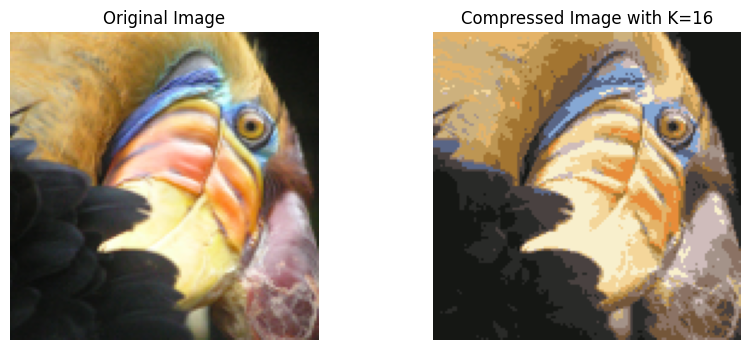

In [ ]:
K = 16  # nombre de couleurs
initial_centroids = init_centroids(X, K)
centroids, idx = run_k_means(X, initial_centroids, max_iters=10)

# Reconstruire l'image compressée
X_compressed = centroids[idx]
A_compressed = X_compressed.reshape(A.shape)

# Afficher l'image originale et compressée
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(A)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Compressed Image with K=16")
plt.imshow(A_compressed)
plt.axis('off')
plt.show()


**Charger et préparer les données pour PCA**

In [ ]:
data2 = loadmat('ex7data2.mat')
X_pca = data2['X']  # dataset pour PCA
print("Shape of PCA dataset:", X_pca.shape)

# Normaliser les features
X_norm = (X_pca - X_pca.mean(axis=0)) / X_pca.std(axis=0)


Shape of PCA dataset: (300, 2)


In [ ]:
# Calculer la covariance
Sigma = np.cov(X_norm.T)

# Décomposition en valeurs singulières
U, S, V = np.linalg.svd(Sigma)

# Projection sur la première composante principale
K_pca = 0
Z = X_norm.dot(U[:, :K_pca])

# Reconstruction depuis la dimension réduite
X_rec = Z.dot(U[:, :K_pca].T)


In [ ]:
print(Sigma)


[[ 1.00334448 -0.22255115]
 [-0.22255115  1.00334448]]


In [ ]:
U

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
S

array([1.22589563, 0.78079333])

In [ ]:
print("Shape of PCA dataset:", X_rec.shape)

Shape of PCA dataset: (300, 2)


**Visualiser les résultats PCA**

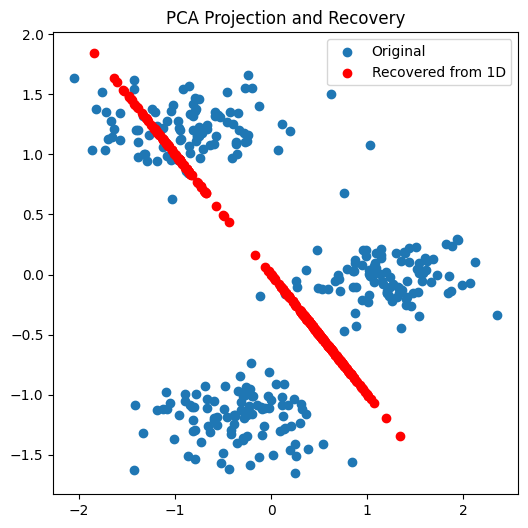

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X_norm[:,0], X_norm[:,1], label='Original')
plt.scatter(X_rec[:,0], X_rec[:,1], c='r', label='Recovered from 1D')
plt.title("PCA Projection and Recovery")
plt.legend()
plt.show()
